In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
final_report_data = pd.read_csv('/file_path.csv')

keyword_performance = final_report_data.groupby('Término de búsqueda').agg({
    'Clics': 'sum',
    'Impr.': 'sum',
    'Conversion es': 'sum'
}).reset_index()

keyword_performance['CTR'] = keyword_performance['Clics'] / keyword_performance['Impr.']
keyword_performance['Conversion Rate'] = keyword_performance['Conversion es'] / keyword_performance['Clics']

keyword_performance.replace([np.inf, -np.inf], np.nan, inplace=True)
keyword_performance.fillna(0, inplace=True)

top_keywords_by_clicks = keyword_performance.sort_values(by='Clics', ascending=False).head(10)
top_keywords_by_conversion_rate = keyword_performance.sort_values(by='Conversion Rate', ascending=False).head(10)

top_keywords_by_clicks, top_keywords_by_conversion_rate



(                    Término de búsqueda  Clics  Impr.  Conversion es  \
 1703                        green glass     34    799              1   
 3028         productos ecologicos chile     18     59              4   
 3023               productos ecologicos     11    162              0   
 3154            productos sustentabl es      9    169              3   
 4710        tiendas sustentabl es chile      9     53              1   
 3133         productos reciclados chile      9     28              0   
 1509     empresas de reciclaje en chile      8     77              0   
 4485                     ropa ecologica      8     46              1   
 4693           tiendas ecologicas chile      7     29              0   
 3025  productos ecologicos al por mayor      6      9              0   
 
            CTR  Conversion Rate  
 1703  0.042553         0.029412  
 3028  0.305085         0.222222  
 3023  0.067901         0.000000  
 3154  0.053254         0.333333  
 4710  0.169811     

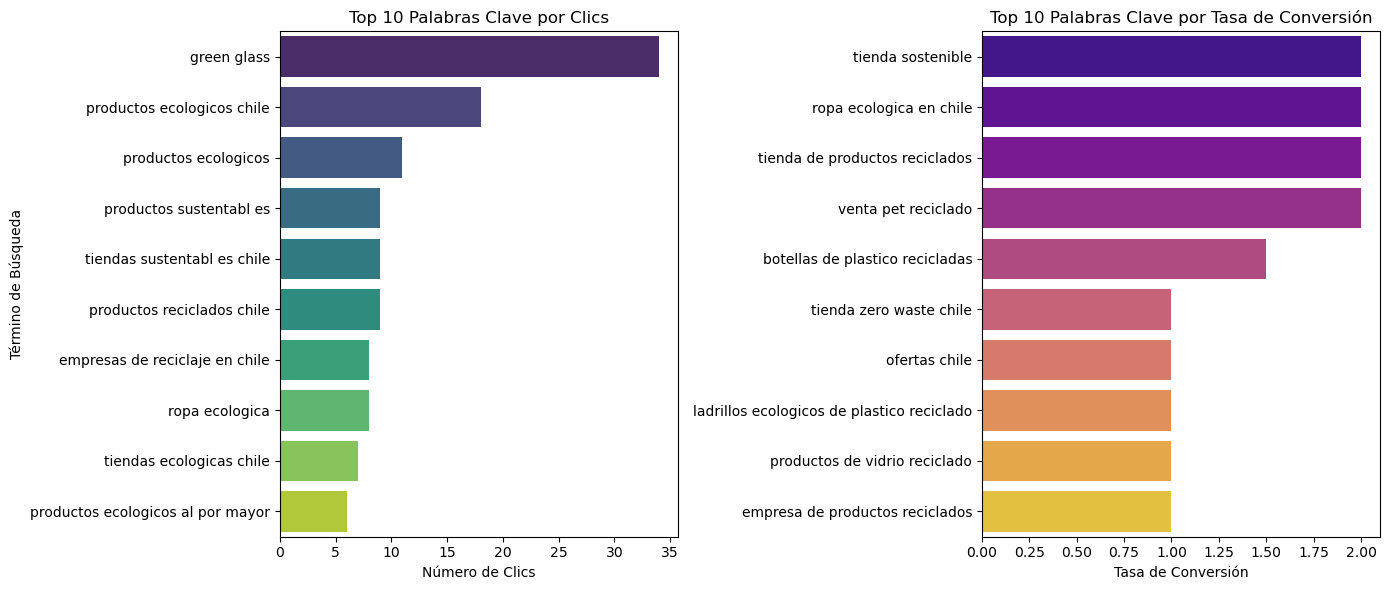

In [4]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_keywords_by_clicks, x='Clics', y='Término de búsqueda', palette='viridis')
plt.title('Top 10 Palabras Clave por Clics')
plt.xlabel('Número de Clics')
plt.ylabel('Término de Búsqueda')

plt.subplot(1, 2, 2)
sns.barplot(data=top_keywords_by_conversion_rate, x='Conversion Rate', y='Término de búsqueda', palette='plasma')
plt.title('Top 10 Palabras Clave por Tasa de Conversión')
plt.xlabel('Tasa de Conversión')
plt.ylabel('')

plt.tight_layout()
plt.show()
